In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('./Sangam_2_train.csv')

In [3]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,Year,Month,Day,Hour
0,2012-10-02 09:00:00,0,121,89,2,329,1,1,288.28,0.0,0.0,40,0,0,5545,2012,10,2,9
1,2012-10-02 10:00:00,0,178,67,3,330,1,1,289.36,0.0,0.0,75,0,1,4516,2012,10,2,10
2,2012-10-02 11:00:00,0,113,66,3,329,2,2,289.58,0.0,0.0,90,0,2,4767,2012,10,2,11
3,2012-10-02 12:00:00,0,20,66,3,329,5,5,290.13,0.0,0.0,90,0,2,5026,2012,10,2,12
4,2012-10-02 13:00:00,0,281,65,3,329,7,7,291.14,0.0,0.0,75,0,1,4918,2012,10,2,13


In [6]:
# Cleaning excess and unwanted columns   @TRY 1

df1 = df.drop(['date_time','wind_speed','dew_point','weather_description'],axis = 1)

In [7]:
df1.head()

,is_holiday,air_pollution_index,humidity,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume,Year,Month,Day,Hour
0,0,121,89,329,1,288.28,0.0,0.0,40,0,5545,2012,10,2,9
1,0,178,67,330,1,289.36,0.0,0.0,75,0,4516,2012,10,2,10
2,0,113,66,329,2,289.58,0.0,0.0,90,0,4767,2012,10,2,11
3,0,20,66,329,5,290.13,0.0,0.0,90,0,5026,2012,10,2,12
4,0,281,65,329,7,291.14,0.0,0.0,75,0,4918,2012,10,2,13


In [8]:
df1.tail()

,is_holiday,air_pollution_index,humidity,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume,Year,Month,Day,Hour
33745,0,74,85,328,7,287.88,0.0,0.0,90,4,2348,2017,5,17,21
33746,0,81,70,24,2,286.95,0.0,0.0,90,2,2194,2017,5,17,22
33747,0,138,70,24,1,286.95,0.0,0.0,90,4,2194,2017,5,17,22
33748,0,229,66,42,6,285.75,0.0,0.0,90,2,1328,2017,5,17,23
33749,0,140,63,27,8,285.75,0.0,0.0,90,4,1328,2017,5,17,23


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
is_holiday             33750 non-null int64
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null int64
traffic_volume         33750 non-null int64
Year                   33750 non-null int64
Month                  33750 non-null int64
Day                    33750 non-null int64
Hour                   33750 non-null int64
dtypes: float64(3), int64(12)
memory usage: 3.9 MB


In [10]:
# encoded weather type, etc

# NUMPY CREATION

In [214]:
data = np.array(df1)
print(data.shape)

(33750, 15)


In [32]:
x1 = data[:,:10]

In [38]:
print(x1)
print(x1.shape)

[[  0. 121.  89. ...   0.  40.   0.]
 [  0. 178.  67. ...   0.  75.   0.]
 [  0. 113.  66. ...   0.  90.   0.]
 ...
 [  0. 138.  70. ...   0.  90.   4.]
 [  0. 229.  66. ...   0.  90.   2.]
 [  0. 140.  63. ...   0.  90.   4.]]
(33750, 10)


In [34]:
x2 = data[:,11:]


In [36]:
print(x2)
print(x2.shape)

[[2.012e+03 1.000e+01 2.000e+00 9.000e+00]
 [2.012e+03 1.000e+01 2.000e+00 1.000e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.100e+01]
 ...
 [2.017e+03 5.000e+00 1.700e+01 2.200e+01]
 [2.017e+03 5.000e+00 1.700e+01 2.300e+01]
 [2.017e+03 5.000e+00 1.700e+01 2.300e+01]]
(33750, 4)


In [43]:
X = np.zeros((33750,14))

In [44]:
X[:,:4]=x2
X[:,4:]=x1

In [45]:
print(X)

[[2.012e+03 1.000e+01 2.000e+00 ... 0.000e+00 4.000e+01 0.000e+00]
 [2.012e+03 1.000e+01 2.000e+00 ... 0.000e+00 7.500e+01 0.000e+00]
 [2.012e+03 1.000e+01 2.000e+00 ... 0.000e+00 9.000e+01 0.000e+00]
 ...
 [2.017e+03 5.000e+00 1.700e+01 ... 0.000e+00 9.000e+01 4.000e+00]
 [2.017e+03 5.000e+00 1.700e+01 ... 0.000e+00 9.000e+01 2.000e+00]
 [2.017e+03 5.000e+00 1.700e+01 ... 0.000e+00 9.000e+01 4.000e+00]]


In [46]:
print(X.shape)

(33750, 14)


In [49]:
Y = data[:,10]

In [51]:
print(Y)
print(Y.shape)

[5545. 4516. 4767. ... 2194. 1328. 1328.]
(33750,)


Train:validation split 80:20

ref https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
try changing ratio

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)

In [63]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(27000, 14)
(27000,)
(6750, 14)
(6750,)


In [109]:
print(X_train)

[[2.013e+03 9.000e+00 1.300e+01 ... 0.000e+00 1.000e+00 1.000e+00]
 [2.017e+03 3.000e+00 3.000e+00 ... 0.000e+00 4.000e+01 0.000e+00]
 [2.013e+03 7.000e+00 1.400e+01 ... 0.000e+00 8.000e+00 4.000e+00]
 ...
 [2.016e+03 8.000e+00 2.900e+01 ... 0.000e+00 9.000e+01 2.000e+00]
 [2.016e+03 9.000e+00 1.200e+01 ... 0.000e+00 9.000e+01 0.000e+00]
 [2.013e+03 3.000e+00 1.100e+01 ... 0.000e+00 9.000e+01 2.000e+00]]


In [110]:
print(Y_test)

[ 383. 3524.  328. ... 3166.  277. 4870.]


# Applying SGDregressor on X,Y
refrence for tuning: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [101]:
from sklearn.linear_model import SGDRegressor

In [142]:
reg = SGDRegressor(max_iter=1000)

In [197]:
reg.fit(X_train,Y_train,coef_init=None, intercept_init=None, sample_weight=None)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [65]:
# done :)

# Predicting and score calculation on validation set

In [112]:
from sklearn.metrics import mean_squared_log_error

In [198]:
#predicting
Y_pred = reg.predict(X_test)

In [199]:
print(Y_pred.shape)

(6750,)


In [200]:
print(Y_pred)


[ 43008.30684863   8020.67141495 -26397.57616246 ...  14769.03967065
  12490.46682798  -9820.51244995]


In [201]:
# inverse transform

In [202]:
Y_pred = scale1.inverse_transform(Y_pred)
Y_test = scale1.inverse_transform(Y_test)

In [203]:
err = mean_squared_log_error(Y_test,Y_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

# Visualising Error

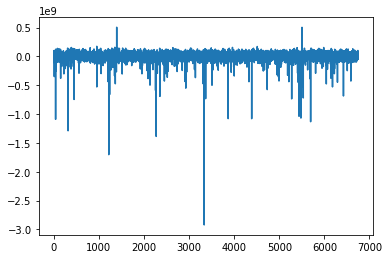

In [204]:
plt.plot(Y_pred)

# Using Linear Model LinearSVR

In [179]:
from sklearn.svm import LinearSVR

In [180]:
reg1 = LinearSVR()

In [196]:
reg1.fit(X_train,Y_train,sample_weight=None)

# after scaling

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [138]:
Y_pred1 = reg1.predict(X_test)

In [139]:
print(Y_pred1)

[1565.4900369  1875.85625182 1411.71165134 ... 3536.75441157 1319.90184424
 2616.53012634]


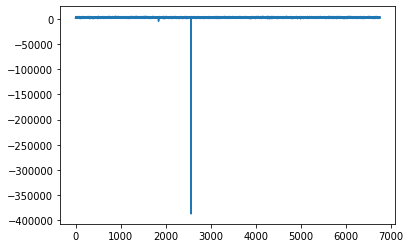

In [141]:
plt.plot(Y_pred1)

In [140]:
err = mean_squared_log_error(Y_test,Y_pred1)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

using ref https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html#sklearn.kernel_approximation.Nystroem

and 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [131]:
# Standard scaling of all data

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scale = StandardScaler()
scale1 = StandardScaler()

In [172]:
X1 = scale.fit_transform(X)
print(X1)

[[-1.67839885  1.01386805 -1.56852703 ... -0.03254579 -0.26906286
  -0.84417311]
 [-1.67839885  1.01386805 -1.56852703 ... -0.03254579  0.63134766
  -0.84417311]
 [-1.67839885  1.01386805 -1.56852703 ... -0.03254579  1.01723789
  -0.84417311]
 ...
 [ 1.50060093 -0.39729017  0.15552386 ... -0.03254579  1.01723789
   0.89673566]
 [ 1.50060093 -0.39729017  0.15552386 ... -0.03254579  1.01723789
   0.02628127]
 [ 1.50060093 -0.39729017  0.15552386 ... -0.03254579  1.01723789
   0.89673566]]


In [190]:
Y1 = scale1.fit_transform(Y.reshape(-1,1))

print(Y1.shape)
print(Y1)
print(Y1.reshape(-1,1))
#Y1 = Y1.reshape(1,-1)
#np.unique(Y1)
print(Y1.shape)

(33750, 1)
[[ 1.15738423]
 [ 0.64067732]
 [ 0.76671564]
 ...
 [-0.52530271]
 [-0.96016003]
 [-0.96016003]]
[[ 1.15738423]
 [ 0.64067732]
 [ 0.76671564]
 ...
 [-0.52530271]
 [-0.96016003]
 [-0.96016003]]
(33750, 1)


In [194]:
Y1 = Y1. flatten()
Y1.shape

(33750,)

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(27000, 14)
(6750, 14)
(27000,)
(6750,)


In [178]:
# now again applying algos

# TRY 3 RANDOM FOREST DATA CLEANING

Removing repeated dates

# Removing outliers

In [206]:
print(data)

[[  0. 121.  89. ...  10.   2.   9.]
 [  0. 178.  67. ...  10.   2.  10.]
 [  0. 113.  66. ...  10.   2.  11.]
 ...
 [  0. 138.  70. ...   5.  17.  22.]
 [  0. 229.  66. ...   5.  17.  23.]
 [  0. 140.  63. ...   5.  17.  23.]]


In [207]:
print(data[:,11:]) #date time

[[2.012e+03 1.000e+01 2.000e+00 9.000e+00]
 [2.012e+03 1.000e+01 2.000e+00 1.000e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.100e+01]
 ...
 [2.017e+03 5.000e+00 1.700e+01 2.200e+01]
 [2.017e+03 5.000e+00 1.700e+01 2.300e+01]
 [2.017e+03 5.000e+00 1.700e+01 2.300e+01]]


In [249]:
# creating an outlier matrix for co-relational analysis
outlier_repeated_date = np.zeros((4,16),dtype='float64')
m = 0 #m always even
#m+1 always odd

In [242]:
data[:,11] #year

array([2012., 2012., 2012., ..., 2017., 2017., 2017.])

In [243]:
data[:,12] # month

array([10., 10., 10., ...,  5.,  5.,  5.])

In [244]:
data[:,13] #day

array([ 2.,  2.,  2., ..., 17., 17., 17.])

In [245]:
data[:,14] #time hr

array([ 9., 10., 11., ..., 22., 23., 23.])

In [273]:
indices = []

In [274]:
for i in range(0,33749): #row wise iteration
    if data[i,11] == data[i+1,11]: #if year of 2 dates is same
        if data[i,12] == data[i+1,12]: #if year, month of 2 date is same
            if data[i,13] == data[i+1,13]: # if year, month, day of 2 date is same
                if data[i,14] == data[i+1,14]: #if date and time are same i.e. an outlier faced
                    outlier_repeated_date[m,1:] = data[i,:]
                    outlier_repeated_date[m+1,1:] = data[i+1,:]
                    #indicies list
                    indices.append(i)
                    m =+2

In [275]:
print(indices)


[178, 180, 182, 269, 270, 272, 274, 276, 277, 279, 280, 282, 283, 285, 288, 295, 297, 301, 303, 305, 358, 400, 403, 404, 405, 407, 409, 410, 412, 414, 415, 417, 424, 432, 434, 435, 437, 439, 442, 444, 445, 447, 448, 450, 451, 453, 454, 456, 457, 459, 460, 461, 463, 464, 465, 467, 468, 470, 471, 472, 486, 537, 541, 543, 545, 546, 548, 549, 550, 552, 554, 555, 556, 558, 559, 562, 564, 565, 567, 568, 570, 572, 573, 576, 578, 581, 590, 594, 601, 602, 603, 605, 606, 607, 608, 610, 611, 613, 614, 616, 617, 618, 620, 621, 623, 624, 626, 627, 631, 632, 634, 636, 637, 639, 640, 641, 643, 644, 645, 646, 648, 649, 650, 652, 653, 655, 657, 658, 660, 661, 663, 664, 665, 667, 668, 669, 671, 674, 878, 885, 941, 943, 945, 947, 948, 950, 951, 953, 955, 956, 958, 960, 961, 962, 964, 965, 967, 969, 971, 972, 974, 976, 984, 986, 987, 988, 990, 1071, 1072, 1073, 1075, 1076, 1078, 1079, 1080, 1082, 1083, 1084, 1085, 1087, 1088, 1090, 1091, 1092, 1094, 1095, 1097, 1099, 1100, 1101, 1102, 1104, 1107, 1109, 11

In [282]:
indices1 = np.array(indices)
print(len(indices))
print(indices1.shape)

5161
(5161,)


In [284]:
ind = pd.DataFrame(indices1)
ind.to_csv("./indices_list.csv",index = False)

In [271]:
print(data[2006,11:])
print(data[2007,11:])


[2012.   12.   14.   20.]
[2012.   12.   14.   20.]


In [261]:
print(outlier_repeated_date[:,12:]) #printing date_time of outlier matrix

[[2012.   10.   10.    7.]
 [2012.   10.   10.    7.]
 [2017.    5.   17.   23.]
 [2017.    5.   17.   23.]]


In [235]:
# # repeating date outlier csv
# out = outlier_repeated_date

In [262]:
out = pd.DataFrame(outlier_repeated_date)
out.to_csv("./outlier_repeated_dates_final1.csv", index= False)

### Finding indices for which data is missing

In [288]:
data_1 = np.zeros((data.shape[0]-len(indices),data.shape[1]))

In [259]:
print(data[:15,11:])

[[2.012e+03 1.000e+01 2.000e+00 9.000e+00]
 [2.012e+03 1.000e+01 2.000e+00 1.000e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.100e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.200e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.300e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.400e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.500e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.600e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.700e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.800e+01]
 [2.012e+03 1.000e+01 2.000e+00 1.900e+01]
 [2.012e+03 1.000e+01 2.000e+00 2.000e+01]
 [2.012e+03 1.000e+01 2.000e+00 2.100e+01]
 [2.012e+03 1.000e+01 2.000e+00 2.200e+01]
 [2.012e+03 1.000e+01 2.000e+00 2.300e+01]]


In [290]:
data1 = np.zeros((data.shape))

In [289]:
print(data_1.shape)

(28589, 15)


In [294]:
d1 = []

In [295]:
# for i in range(data.shape[0]):
#     for j in range (len(indices)):
#         if i != indices[j]:
#             d = data[i]
#             #print(d)
#     d1.append(d)
        

In [297]:
# print(d1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [298]:
# d1[5]

array([0.0000e+00, 2.3000e+01, 6.5000e+01, 3.2800e+02, 6.0000e+00,
       2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       5.1810e+03, 2.0120e+03, 1.0000e+01, 2.0000e+00, 1.4000e+01])

In [299]:
# len(d1)

33750

In [308]:
# for i in range (len(indices)):
#     df1.drop([indices[i]])
# df1.drop([indices],axis=0)

In [306]:
# print(df1)